# RECOMMENDATION SYSTEM

Nowadays, we have access to an enormous amount of information that can be really helpful. However, it's not always easy to find what we need or want in this sea of data. That's where recommendation systems come in! These systems use algorithms to identify similarities between users and items (like products, services, or content), and use these similarities to suggest personalized recommendations to users. In other words, they help users discover things they might like or find useful based on their past behavior or preferences.

There are several types of recommendation system algorithms, but we'll be focusing on collaborative filtering. This method operates on the assumption that people tend to like things that are similar to other things they already like, and that individuals with similar tastes tend to like similar things. Collaborative filtering can be divided into two main categories: user-user and item-item filtering. The former recommends items to a user based on the preferences of other users who are similar to them, while the latter suggests items that are similar to ones that the user has already shown a liking for.

loading the data


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
data=pd.read_csv("C:/Users/chani/Downloads/Amazon_ratings.csv",header=None)

In [3]:
data.columns=['User_id','Product_id','Rating','Timestamp']


In [4]:
data.head()

,User_id,Product_id,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
data.shape # this gives us the dimensions of the data 

(7824482, 4)

In [6]:
#As the dataset is huge we will take the subset of the dataset
subset=data.iloc[:10000,0:]

In [7]:
subset.describe()
#Average rating is 3.92 max rating is 5 minimum rating is 1

,Rating,Timestamp
count,10000.000000,1.000000e+04
mean,3.920000,1.313614e+09
std,1.467384,1.024291e+08
min,1.000000,9.127296e+08
25%,3.000000,1.292198e+09
50%,5.000000,1.354147e+09
75%,5.000000,1.379894e+09
max,5.000000,1.405987e+09


Cleaning the data

In [8]:
#check of missing values
subset.isnull().sum().sort_values(ascending=False)

User_id       0
Product_id    0
Rating        0
Timestamp     0
dtype: int64

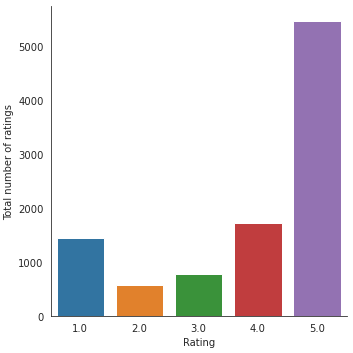

In [9]:
with sns.axes_style('white'):
    g = sns.factorplot("Rating", data=subset, aspect=1.0,kind='count')
    g.set_ylabels("Total number of ratings")

In [10]:
# from the above plot most of the people has given rating 5

In [11]:
print("\nTotal no of ratings :",subset.shape[0])
print("Total No of Users   :", len(np.unique(subset.User_id)))
print("Total No of products  :", len(np.unique(subset.Product_id)))


Total no of ratings : 10000
Total No of Users   : 9826
Total No of products  : 1305


In [12]:
# we can drop Timestamp as it has no significance 
subset.drop(['Timestamp'],axis=1,inplace=True)

In [13]:
products_peruser=subset.groupby(by='User_id')['Rating'].count().sort_values(ascending=False)
products_peruser

User_id
AT8TIN5JKHO2V     5
A3LDPF5FMB782Z    5
A1TBH7Z4RK7PRK    4
A2HDTOF8222KN3    3
A36V8NDDRZYRYO    3
                 ..
A2AFGNDUPNWVSN    1
A2AGGWPJZODA0A    1
A2AGJ1MQ1PBAEG    1
A2AHGLZS5HTJ8R    1
AZZMV5VT9W7Y8     1
Name: Rating, Length: 9826, dtype: int64

Collaberative filtering -Item-Item recommedation
We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes


# Item-based

In [14]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [15]:
#preprocessing
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
Data = Dataset.load_from_df(subset,reader)

In [16]:
#Splitting the dataset
train_, test_ = train_test_split(Data, test_size=0.3,random_state=42)

In [17]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
KNNalgo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
KNNalgo.fit(train_)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [28]:
#Prediction on test set 
TEST=KNNalgo.test(test_)
TEST

[Prediction(uid='AMRAZXDYWWZVT', iid='9966299211', r_ui=5.0, est=3.92, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1OO47RRQ4I29R', iid='0972683275', r_ui=5.0, est=3.92, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A125KJE0RCKGHF', iid='B000001OMV', r_ui=2.0, est=3.92, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2JPY5OA6FSW0T', iid='1400532655', r_ui=5.0, est=3.92, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AEPHHBICQ2W2M', iid='1400501466', r_ui=2.0, est=3.92, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A1SNHYX5PKMFCA', iid='1400532620', r_ui=5.0, est=3.92, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2DLK5KEQU4TX9', iid='B00000J08C', r_ui=5.0, est=3.92, details={'was_impossible': True, 're

In [32]:
accuracy.rmse(TEST, verbose=True)


RMSE: 1.4684


1.4683692113027342

# MODEL-Based

Model-based collaborative filtering system
The objective is to build machine learning models that can make predictions based on existing data. For instance, we can use the past interactions between users and items to train a model, which can then predict the top 5 items that a user is most likely to prefer.






In [33]:
matrix = subset.pivot_table(values='Rating', index='User_id', columns='Product_id', fill_value=0)
matrix.head()

Product_id,0132793040,0321732944,0439886341,0511189877,0528881469,0558835155,059400232X,0594012015,0594017343,0594017580,...,B00000J1DN,B00000J1DT,B00000J1E6,B00000J1EC,B00000J1EJ,B00000J1EP,B00000J1EQ,B00000J1ES,B00000J1EZ,B00000J1F3
User_id,,,,,,,,,,,,,,,,,,,,,
A00766851QZZUBOVF4JFT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A01255851ZO1U93P8RKGE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0402564TCEO67AUZFJO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# in the above sparce matrix unknown values are filled with zeros
matrix.shape

(9826, 1305)

In [39]:
X = matrix.T
X.head()

User_id,A00766851QZZUBOVF4JFT,A01255851ZO1U93P8RKGE,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0402564TCEO67AUZFJO,A04256643L1ZMT75HVD2P,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A07865442XT0VEAVPSGX1,...,AZV9WA9MNT0FB,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXFQVG0PS3V1,AZYNQZ94U6VDB,AZYTSU42BZ7TP,AZZ77XYX8O2WE,AZZGUU97OHUF1,AZZMV5VT9W7Y8
Product_id,,,,,,,,,,,,,,,,,,,,,
0132793040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0321732944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0439886341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0511189877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
0528881469,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X.shape
#decomposing the matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(1305, 10)

In [45]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(1305, 1305)

In [47]:
X.index[75]

'1600775160'

In [49]:
i = "1600775160"

product_names = list(X.index)
prod_ID = product_names.index(i)
prod_ID

75

#In collaborative filtering approach where the correlation between items is computed based on the ratings given by other customers who bought the same product as the customer in question. The correlation is used to identify items that are similar to the one purchased by the customer, and these similar items are then recommended to the customer.

In [52]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID

array([ 0.63824485, -0.82645222,  0.7070708 , ...,  0.87068858,
       -0.95937142,  0.87098816])

In [54]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:10]

['0439886341',
 '0594012015',
 '0594287995',
 '0594514789',
 '0899336795',
 '0983947600',
 '1182702627',
 '1254875778',
 '1400699894',
 '1444501399']

In [ ]:
# Above are the top 10 products to be displayed by the recommendation
#system to the above customer